# A simple model of global cascades on random networks

**Recreating the model specified in:**
Watts, D. J. (2002). A simple model of global cascades on random networks. Proc. Natl. Acad. Sci. U.S.A., 99(9), 5766–5771. doi: 10.1073/pnas.082090499

In [127]:
import networkx as nx
import matplotlib
import random

## Model specifications
- Binary decision rule with externalities, agents are either in state 1 or 0
- Agent observes current states of $k$ other agents (neighbours)
- Agent adopts state 1 if fraction of neighbours $>= \varphi$ (threshold)
- Thresholds and number of neighbors are heterogeneous
- Each agent is assigned a $\varphi$ drawn from a distribution $f(\varphi)$
- $f(\varphi)$ with $x \in [0, 1]$ and $ \int_{1}^{0} f(\varphi)d\varphi = 1$
- Construct a network of $n$ agents, in which each agent is connected to $k$ neighbors with probability $p_k$ and the average number of neighbors is $〈k〉 = z$
- $〈k〉$ = expected value of k
- $p_k$ is degree distribution
- $z$ is average degree
- At $t=0$, $\Phi_0 << 1$ of agents switch to 1

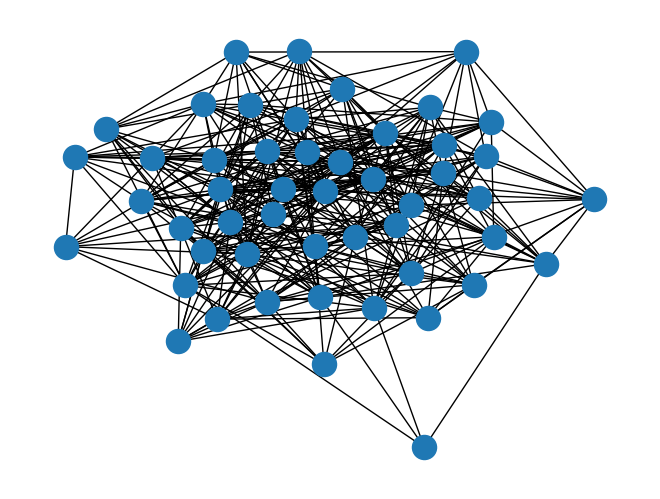

In [128]:
G = nx.gnp_random_graph(50,0.3)
nx.set_node_attributes(G, 0, "state")
nx.draw(G)

In [129]:
node_ids = list(G.nodes)
for i in node_ids:
    k = len(G.adj[i])
    phi = random.choice(list(range(0,len(G.adj[i])+1)))
    attrs = {i: {"phi": phi}}
    nx.set_node_attributes(G, attrs)